In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("../data/customer_360.csv")
df.head()


,customerID,gender,SeniorCitizen,tenure,TenureGroup,Contract,InternetService,MonthlyCharges,TotalCharges,AvgMonthlySpend,Churn,ChurnFlag
0,7590-VHVEG,Female,0,1,0-1 yr,Month-to-month,DSL,29.85,29.85,14.925000,No,0
1,5575-GNVDE,Male,0,34,2-4 yrs,One year,DSL,56.95,1889.50,53.985714,No,0
2,3668-QPYBK,Male,0,2,0-1 yr,Month-to-month,DSL,53.85,108.15,36.050000,Yes,1
3,7795-CFOCW,Male,0,45,2-4 yrs,One year,DSL,42.30,1840.75,40.016304,No,0
4,9237-HQITU,Female,0,2,0-1 yr,Month-to-month,Fiber optic,70.70,151.65,50.550000,Yes,1


In [3]:
segmentation_features = df[
    ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend']
]


In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(segmentation_features)


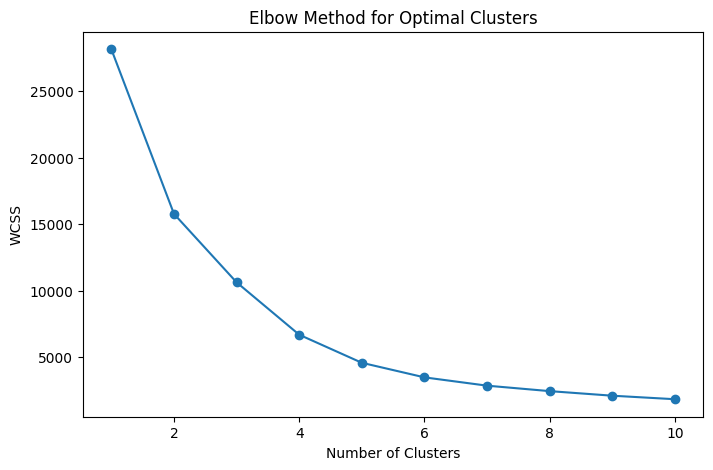

In [5]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)


In [7]:
df.groupby('Segment')[[
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'AvgMonthlySpend',
    'ChurnFlag'
]].mean()


,tenure,MonthlyCharges,TotalCharges,AvgMonthlySpend,ChurnFlag
Segment,,,,,
0,26.601393,29.063048,740.470504,24.996467,0.162638
1,58.861766,89.916828,5284.278941,88.406309,0.151179
2,0.000000,41.418182,1397.475000,1397.475000,0.000000
3,14.719110,78.347611,1160.949279,67.229367,0.471582


In [8]:
df.groupby('Segment')[[
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'AvgMonthlySpend',
    'ChurnFlag'
]].mean()


,tenure,MonthlyCharges,TotalCharges,AvgMonthlySpend,ChurnFlag
Segment,,,,,
0,26.601393,29.063048,740.470504,24.996467,0.162638
1,58.861766,89.916828,5284.278941,88.406309,0.151179
2,0.000000,41.418182,1397.475000,1397.475000,0.000000
3,14.719110,78.347611,1160.949279,67.229367,0.471582


In [9]:
segment_map = {
    0: "High Value Loyal",
    1: "High Value At Risk",
    2: "Price Sensitive",
    3: "New High Risk"
}

df['SegmentLabel'] = df['Segment'].map(segment_map)


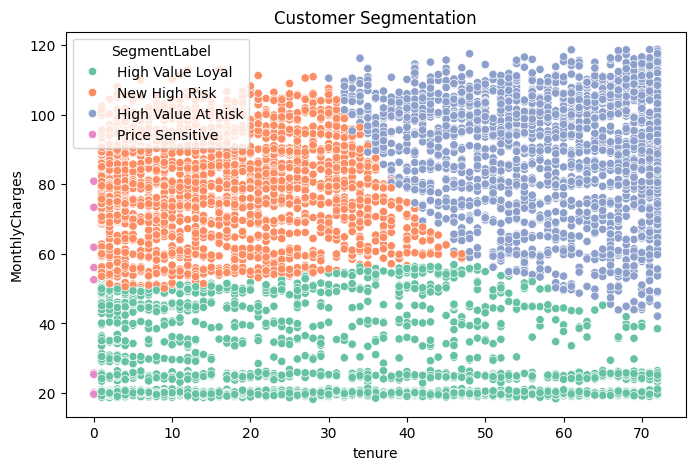

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='tenure',
    y='MonthlyCharges',
    hue='SegmentLabel',
    palette='Set2'
)
plt.title("Customer Segmentation")
plt.show()


In [11]:
df.to_csv("../data/customer_segmented.csv", index=False)
